# Import stuff

In [2]:
import os
import wget
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [3]:
%matplotlib inline

# Download and extract dataset

In [4]:
current_dir = os.getcwd()
if not os.path.exists(os.path.join(current_dir, "METR-LA.zip")):
    URL = "https://graphmining.ai/temporal_datasets/METR-LA.zip"
    FILE = wget.download(URL, "METR-LA.zip")

if not os.path.exists(os.path.join(current_dir, "METR-LA")):
    with zipfile.ZipFile(os.path.join(current_dir, "METR-LA.zip"), 'r') as zip_ref:
        zip_ref.extractall(os.path.join(current_dir,"METR-LA") )

# Loading dataset into the memory

In [5]:
data_path = os.path.join(current_dir, "METR-LA")
t_series_path = os.path.join(data_path, "node_values.npy")

t_series = # TODO Load dataset here
t_series = t_series.astype(np.float32)

In [6]:
t_series.shape # No of sensors ,feats(speed and flow), No of steps

(207, 2, 34272)

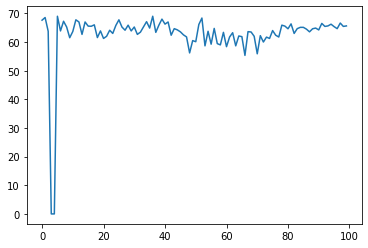

In [7]:
sensor_id = 1 
speed_index = 0

# TODO plot first 100 timesteps of the 1 node

# Handling missing values
## Exercise
### Pick one of them and implement it
## Replacing with the maximum value
Makes sense here because when the values are zero, the sensor didn't detect a vehicle in a 5 minutes interval. So we can assume that a vehicle can go at maximum speed

### Replacing with mean value in training set
### Replacing with the last observed value

## Data Standardization & Normalization

### Min-Max normalization
## $x_{scaled} = \frac{value - min}{max - min}$

### Z-score normalization
## $x_{scaled} = \frac{value - \mu}{\sigma}$

## Excercise: Choose one method and implement it

In [ ]:
# TODO Data Normalization

In [15]:
in_steps = 12
out_steps = 12

# TODO: Transform the data to the shape in the next cell

In [16]:
print("features", features.shape)  # No of steps, input_len, No of sensors ,(speed and flow)
print("target", target.shape)      # No of steps, input_len, No of sensors ,(speed and flow)

features (34249, 12, 207, 2)
target (34249, 12, 207, 2)


In [17]:
train_percentage = .7
valid_percentage = .1
test_percentage  = .2

len_dataset = len(t_series[sensor_id, 0, :])

start_train = 0
end_train   = round(len_dataset * train_percentage)

start_valid = end_train
end_valid   = round(start_valid + len_dataset * valid_percentage)

start_test = end_valid
end_test   = round(start_test + len_dataset * test_percentage)

X_train = features[start_train:end_train, :, :, :]
y_train = target[start_train:end_train, :, :, :]

X_valid = features[start_valid:end_valid, :, :, :]
y_valid = target[start_valid:end_valid, :, :, :]

X_test  = features[start_test:end_test, :, :, :]
y_test  = target[start_test:end_test, :, :, :]

X_train.shape, y_train.shape

((23990, 12, 207, 2), (23990, 12, 207, 2))

In [18]:
class MetrLA(Dataset):   
    def __init__(self, X, y, seq_len):
        self.X = X
        self.y = y
        self.seq_len = seq_len

    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)

    def __getitem__(self, index):
        return {'X': self.X[index, :, :, :], 'y': self.y[index, :, :, :]}

In [19]:
batch_size = 128

train_dataset = MetrLA(X_train, y_train, seq_len=12)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

valid_dataset = MetrLA(X_valid, y_valid, seq_len=12)
valid_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = True)

test_dataset = MetrLA(X_test, y_test, seq_len=12)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [20]:
num_batches = len(train_loader)
num_batches

188

In [21]:
for batch in train_loader:
    print(batch['X'].shape, batch['y'].shape) # batch, time step, No sensor, feats
    break

torch.Size([128, 12, 207, 2]) torch.Size([128, 12, 207, 2])


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
class Lstm(nn.Module):
    def __init__(self):
        super().__init__()

            
        # TODO your input size shoud be number of nodes time feature dimention

        # TODO Use your previous excersie model or use the LSTM from pytorch

        # TODO add a fully connected layer

    def forward(self, batch):
        
        # TODO 

        
        for i in range(self.output_window):
            # TODO use this loop to incrementally predict in the future
            # Then concatenate the results

        return outputs

In [24]:
# TODO define the model, optimizer and loss function

In [25]:
def train(train_loader, valid_loader, epochs, model, optimizer, loss_fn):

    min_val_loss = float('inf')
    best_epoch = 0
    train_time = []
    eval_time = []
    num_batches = len(train_loader)

    for epoch_idx in range(epochs):
        ### Train
        model.train()
        train_losses = []
        for batch in train_loader:
            optimizer.zero_grad()
            
            y_true = batch['y'][:,:,:,0,None].to(device) # We only predict speed
            y_pred = model(batch)
#             print("y_true: ", y_true.shape)
#             print("y_pred: ", y_pred.shape)
            
            loss = loss_fn(y_pred, y_true)
            
            train_losses.append(loss.item())
            loss.backward()
            optimizer.step()
            
        mean_train_loss = np.mean(train_losses)
        print("Train loss: ", mean_train_loss)
        #### Valid
        with torch.no_grad():
            model.eval()
            valid_losses = []
            for batch in valid_loader:
                y_true = batch['y'][:,:,:,0,None].to(device)
                y_pred = model(batch)
                
                loss = loss_fn(y_pred, y_true)
                valid_losses.append(loss.item())
            mean_valid_loss = np.mean(valid_losses)
            print('valid loss', mean_valid_loss)
            
    return train_losses, valid_losses

In [ ]:
train_losses, valid_losses = train(train_loader, valid_loader, 100, model, optimizer, loss_fn)

In [ ]:
# TODO do the same with GRU
class Gru(nn.Module):
    def __init__(self):
        super().__init__()

            
        # TODO your input size shoud be number of nodes time feature dimention

        # TODO Use your previous excersie model or use the GRU from pytorch

        # TODO add a fully connected layer

    def forward(self, batch):
        
        # TODO 

        
        for i in range(self.output_window):
            # TODO use this loop to incrementally predict in the future
            # Then concatenate the results

        return outputs